In [1]:
pip install tensorflow numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Load the CIFAR-10 Dataset

In [3]:
(x_train, _) , (x_test, _) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# Normalize images (scale pixel values between 0 and 1)

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images (MLP requires 1D input)

In [5]:
x_train = x_train.reshape((-1, 32*32 * 3))
x_test = x_test.reshape((-1, 32*32 *3))


In [6]:
print('Training shape: ', x_train.shape)
print('Testing shape: ', x_test.shape)


Training shape:  (50000, 3072)
Testing shape:  (10000, 3072)


Add Noise to the Images

In [7]:
def add_noise(images, noise_factor=0.3):
  noisy_images = images + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=images.shape)
  return np.clip(noisy_images, 0.0, 1.0)


# Apply noise

In [8]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


# Show sample noisy images

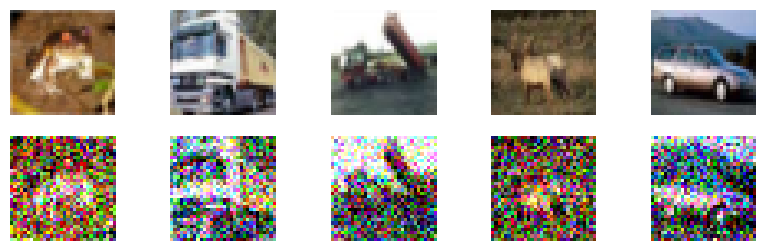

In [9]:
plt.figure(figsize=(10,3))

for i in range(5):
  plt.subplot(2,5, i+1)
  plt.imshow(x_train[i].reshape(32,32,3))
  plt.axis('off')


  plt.subplot(2,5, i+6)
  plt.imshow(x_train_noisy[i].reshape(32,32,3))
  plt.axis('off')

plt.show()


Build the MLP Model

In [10]:
model = keras.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(32*32 *3,)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(32*32*3, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse')


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3072)                │       3,148,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,540,480 (44.02 MB)

 Trainable params: 11,540,480 (44.02 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [14]:
history = model.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_noisy, x_test)

)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 131s 331ms/step - loss: 0.0409 - val_loss: 0.0231
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 336ms/step - loss: 0.0213 - val_loss: 0.0163
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 334ms/step - loss: 0.0157 - val_loss: 0.0141
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 146s 344ms/step - loss: 0.0138 - val_loss: 0.0128
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 134s 342ms/step - loss: 0.0126 - val_loss: 0.0124
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 318ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 331ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 334ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 325ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 331ms/step - loss: 0.0102 - val_loss: 0.0103


Evaluate and Test the Model

In [15]:
denoised_images = model.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


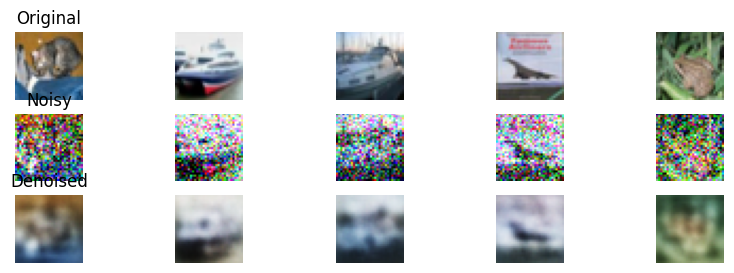

In [16]:
plt.figure(figsize=(10,3))

for i in range(5):
  plt.subplot(3,5, i+1)
  plt.imshow(x_test[i].reshape(32,32,3))
  plt.axis('off')
  if i==0: plt.title('Original')

  plt.subplot(3,5, i+6)
  plt.imshow(x_test_noisy[i].reshape(32,32,3))
  plt.axis('off')
  if i == 0: plt.title('Noisy')

  plt.subplot(3,5, i+11)
  plt.imshow(denoised_images[i].reshape(32,32,3))
  plt.axis('off')
  if i ==0 : plt.title('Denoised')

plt.show()

